In [1]:
from brainmri.dataset.stacker import MriStacker
from brainmri.dataset.dataset import *
from brainmri.runner.train import train_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import segmentation_models_pytorch as smp

In [2]:
config = {
     'make_stacks': True,
     'stack_size': 3,
     'data_dir': './data/lgg-mri-segmentation/kaggle_3m/',
     'out_dir': './data/lgg-mri-segmentation/2.5D/StackSize=3',
     'model_out_pth': './models/unet-efficientnet-b4_aug_{date}.pth',
     'augmentations': True,
     'epochs': 75,
     'batch_size': 32,
     'lr': 5e-05,
     'optimizer': 'adam',
     'model': 'unet',
     'model_encoder': 'efficientnet-b4',
     'model_act': 'sigmoid',
     'encoder_weights': 'imagenet',
     'device': 'cuda',
     'num_classes': 1
}

In [3]:
A.__version__

'0.2.3'

In [4]:
stacker = MriStacker(root_dir=config.get("data_dir"),
                         out_dir=config.get("out_dir"),
                         stack_size=config.get("stack_size"))

if config.get("make_stacks"):
    stacker.process_patients()

stacker.gen_train_val_test_split()


preprocessing_fn = get_preprocessing_fn(config.get("model_encoder"), config.get("encoder_weights"))
train_ds = BrainMriSegmentation(stacker.train_df, config.get("stack_size"),
                                transforms=get_augmentations(is_train=True, apply_transforms=config.get("augmentations")),
                                preprocessing=get_preprocessing(preprocessing_fn))
valid_ds = BrainMriSegmentation(stacker.valid_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))

train_dl = get_dataloader(train_ds, bs=config.get("batch_size"))
valid_dl = get_dataloader(valid_ds, bs=config.get("batch_size"))

train_loss, val_loss, train_fscore, val_fscore, train_iou, val_iou  = train_model(config, train_dl, valid_dl)


/home/nlittlefield/.local/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1741: UserWarning: Using lambda is incompatible with multiprocessing. Consider using regular functions or partial().
  warnings.warn('Using lambda is incompatible with multiprocessing. '


Training unet w/ efficientnet-b4 backbone
Let's use 2 GPUs!

Epoch: 0
valid: 100%|██████████| 19/19 [00:03<00:00,  6.24it/s, dice_loss - 0.9376, iou_score - 0.1814, fscore - 0.3048]
Model saved!

Epoch: 1
valid: 100%|██████████| 19/19 [00:03<00:00,  6.50it/s, dice_loss - 0.8909, iou_score - 0.2844, fscore - 0.4414]
Model saved!

Epoch: 2
valid: 100%|██████████| 19/19 [00:04<00:00,  3.26it/s, dice_loss - 0.8688, iou_score - 0.3936, fscore - 0.5629]
Model saved!

Epoch: 3
valid: 100%|██████████| 19/19 [00:05<00:00,  3.20it/s, dice_loss - 0.8385, iou_score - 0.4984, fscore - 0.6641]
Model saved!

Epoch: 4
valid: 100%|██████████| 19/19 [00:03<00:00,  6.18it/s, dice_loss - 0.801, iou_score - 0.5391, fscore - 0.6976] 
Model saved!

Epoch: 5
valid: 100%|██████████| 19/19 [00:04<00:00,  3.37it/s, dice_loss - 0.7638, iou_score - 0.5823, fscore - 0.7328]
Model saved!

Epoch: 6
valid: 100%|██████████| 19/19 [00:03<00:00,  3.68it/s, dice_loss - 0.69, iou_score - 0.6328, fscore - 0.7728]  
Model sa

valid: 100%|██████████| 19/19 [00:03<00:00,  6.15it/s, dice_loss - 0.1333, iou_score - 0.8019, fscore - 0.8896]
Model saved!

Epoch: 34
valid: 100%|██████████| 19/19 [00:03<00:00,  6.60it/s, dice_loss - 0.1335, iou_score - 0.8028, fscore - 0.8894]

Epoch: 35
valid: 100%|██████████| 19/19 [00:03<00:00,  6.46it/s, dice_loss - 0.1295, iou_score - 0.8068, fscore - 0.8924]
Model saved!

Epoch: 36
valid: 100%|██████████| 19/19 [00:03<00:00,  5.67it/s, dice_loss - 0.1318, iou_score - 0.8022, fscore - 0.8892]

Epoch: 37
valid: 100%|██████████| 19/19 [00:03<00:00,  5.70it/s, dice_loss - 0.1302, iou_score - 0.8051, fscore - 0.8918]

Epoch: 38
valid: 100%|██████████| 19/19 [00:03<00:00,  6.30it/s, dice_loss - 0.1302, iou_score - 0.7961, fscore - 0.8858]

Epoch: 39
valid: 100%|██████████| 19/19 [00:03<00:00,  6.36it/s, dice_loss - 0.1227, iou_score - 0.8087, fscore - 0.8939]
Model saved!

Epoch: 40
valid: 100%|██████████| 19/19 [00:03<00:00,  6.01it/s, dice_loss - 0.118, iou_score - 0.8124, fscore

valid: 100%|██████████| 19/19 [00:03<00:00,  6.25it/s, dice_loss - 0.1047, iou_score - 0.8173, fscore - 0.899] 

Epoch: 68
valid: 100%|██████████| 19/19 [00:03<00:00,  6.42it/s, dice_loss - 0.1102, iou_score - 0.8081, fscore - 0.8933]

Epoch: 69
valid: 100%|██████████| 19/19 [00:03<00:00,  6.02it/s, dice_loss - 0.107, iou_score - 0.8144, fscore - 0.8968] 

Epoch: 70
valid: 100%|██████████| 19/19 [00:03<00:00,  6.16it/s, dice_loss - 0.107, iou_score - 0.8126, fscore - 0.8961] 

Epoch: 71
valid: 100%|██████████| 19/19 [00:03<00:00,  6.30it/s, dice_loss - 0.1059, iou_score - 0.815, fscore - 0.8976] 

Epoch: 72
valid: 100%|██████████| 19/19 [00:03<00:00,  6.20it/s, dice_loss - 0.1045, iou_score - 0.8185, fscore - 0.8998]

Epoch: 73
valid: 100%|██████████| 19/19 [00:03<00:00,  6.13it/s, dice_loss - 0.1042, iou_score - 0.8179, fscore - 0.899] 

Epoch: 74
valid: 100%|██████████| 19/19 [00:03<00:00,  6.30it/s, dice_loss - 0.1019, iou_score - 0.8213, fscore - 0.9012]


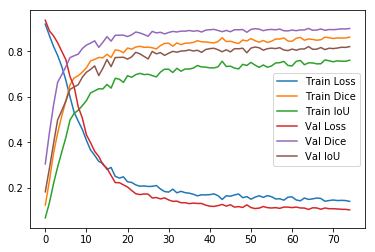

In [5]:
plt.plot(train_loss)
plt.plot(train_fscore)
plt.plot(train_iou)
plt.plot(val_loss)
plt.plot(val_fscore)
plt.plot(val_iou)                                                                                

plt.legend(["Train Loss",  "Train Dice", "Train IoU", "Val Loss", "Val Dice", "Val IoU"])

In [6]:
best_model = torch.load("./models/unet-efficientnet-b4_aug_2021-08-25.pth")

In [7]:
test_ds = BrainMriSegmentation(stacker.test_df, config.get("stack_size"),
                                transforms=None, preprocessing=get_preprocessing(preprocessing_fn))
test_dl = get_dataloader(test_ds, bs=config.get("batch_size"))

In [8]:
loss = smp.utils.losses.DiceLoss()
metrics = [smp.utils.metrics.IoU(threshold=0.5), smp.utils.metrics.Fscore(threshold=0.5)]
    
test_epoch =  smp.utils.train.ValidEpoch(
    best_model,
    loss=loss,
    metrics=metrics,
    device=config.get("device"),
    verbose=True
)

In [9]:
test_epoch.run(test_dl)

valid: 100%|██████████| 11/11 [00:01<00:00,  6.38it/s, dice_loss - 0.1189, iou_score - 0.7965, fscore - 0.8862]


{'dice_loss': 0.11885055086829445,
 'iou_score': 0.7964824221350929,
 'fscore': 0.8862440748648209}